<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_ML/blob/main/Lab_10_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [1]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from prettytable import PrettyTable
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn import set_config
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Mounted at /content/gdrive
/content/gdrive/MyDrive/data


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [5]:
#code
iris = datasets.load_iris()
X = iris.data
y = iris.target

svm_clf =svm.SVC(kernel="sigmoid", random_state=42)

svm_scores = cross_validate(svm_clf, X, y, scoring='accuracy', cv=10)

print(sorted(svm_scores.keys()))
print(np.mean(svm_scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [7]:
#code
X_new = SelectKBest(chi2, k = 2).fit_transform(X, y)

rf_clf = RandomForestClassifier(n_estimators=100)
rf_scores = cross_validate(rf_clf, X_new, y, scoring='accuracy', cv=10)

kNN_clf = KNeighborsClassifier(n_neighbors=10)
kNN_scores = cross_validate(kNN_clf, X_new, y, scoring='accuracy', cv=10)

*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [8]:
#code
t = PrettyTable(['Algorithms', 'Test score'])
t.add_row(['SVM', np.mean(svm_scores['test_score'])])
t.add_row(['Random Forest with feature selection', np.mean(rf_scores['test_score'])])
t.add_row(['kNN with feature selection', np.mean(kNN_scores['test_score'])])

print(t)

+--------------------------------------+---------------------+
|              Algorithms              |      Test score     |
+--------------------------------------+---------------------+
|                 SVM                  | 0.06666666666666668 |
| Random Forest with feature selection |  0.9666666666666666 |
|      kNN with feature selection      |         0.96        |
+--------------------------------------+---------------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [17]:
# code
fashion = pd.read_csv('fashion_train.csv')
X = fashion.drop(columns='y')
y = fashion[['y']]

kmeans = KMeans(n_clusters = 10, random_state = 42, n_init="auto")
kmeans.fit(X)
clusters = kmeans.predict(X)

labels = np.zeros_like(clusters)
for i in range(10):
  mask = (clusters == i)
  #print(mask)
  labels[mask] = mode(y[mask])[0]
  #print(labels[mask])
print("Accuracy:", metrics.accuracy_score(y, labels))

Accuracy: 0.495


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [18]:
# code
def printScore(model):
  print("Accuracy:", cross_val_score(model, X, y.values.ravel(), cv=10, scoring='accuracy').mean())
  print("Precision:", cross_val_score(model, X, y.values.ravel(), cv=10, scoring='precision_macro').mean())
  print("Recall:", cross_val_score(model, X, y.values.ravel(), cv=10, scoring='recall_macro').mean())
  print("F1 measure:",cross_val_score(model, X, y.values.ravel(), cv=10, scoring='f1_macro').mean())

rf_model = RandomForestClassifier(n_estimators=100)
print("RandomForest")
printScore(rf_model)

print("-------------------------------------")
kNN_model = KNeighborsClassifier()
print("kNN")
printScore(kNN_model)

print("-------------------------------------")
svm_model = svm.SVC(kernel='rbf', random_state=0)
print("SVM")
printScore(svm_model)

RandomForest
Accuracy: 0.789
Precision: 0.7978754537945715
Recall: 0.8074438616938618
F1 measure: 0.79717777868362
-------------------------------------
kNN
Accuracy: 0.763
Precision: 0.7907057786984256
Recall: 0.7690442890442889
F1 measure: 0.7665658445110697
-------------------------------------
SVM
Accuracy: 0.792
Precision: 0.8078633793537044
Recall: 0.7993552836052835
F1 measure: 0.7948694638113898


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [ ]:
#code
print("Ở đây ta thấy đối với bài toán trên thì Supervised learning (học có giám sát) cho ra kết quả tốt hơn")

Ở đây ta thấy đối với bài toán trên thì Supervised learning (học có giám sát) cho ra kết quả tốt hơn


2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [20]:
#code
cluster = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
cluster.fit_predict(X)
cluster.labels_

array([0, 7, 2, 0, 6, 3, 2, 2, 7, 1, 2, 3, 4, 1, 8, 0, 1, 0, 0, 7, 2, 6,
       0, 0, 6, 5, 4, 7, 4, 6, 6, 1, 0, 2, 0, 0, 9, 0, 1, 5, 2, 3, 2, 6,
       1, 0, 9, 5, 1, 4, 0, 7, 7, 5, 3, 4, 1, 9, 0, 0, 1, 3, 3, 4, 6, 2,
       4, 1, 3, 6, 7, 1, 4, 3, 7, 6, 3, 4, 4, 2, 1, 3, 4, 0, 0, 9, 6, 0,
       7, 2, 8, 4, 7, 1, 2, 2, 1, 1, 4, 6, 6, 0, 3, 1, 8, 0, 2, 4, 0, 2,
       3, 4, 2, 1, 8, 1, 1, 8, 2, 2, 0, 1, 3, 6, 6, 5, 8, 1, 9, 0, 7, 4,
       0, 1, 2, 4, 6, 2, 6, 6, 2, 0, 6, 4, 6, 8, 4, 4, 0, 1, 1, 1, 1, 1,
       2, 3, 5, 0, 5, 9, 3, 3, 6, 8, 6, 8, 2, 6, 4, 7, 1, 0, 3, 7, 2, 6,
       4, 4, 3, 7, 1, 0, 0, 2, 6, 4, 0, 2, 8, 3, 1, 4, 8, 3, 5, 0, 6, 1,
       2, 0, 6, 4, 6, 6, 3, 8, 2, 4, 8, 2, 3, 0, 1, 6, 3, 6, 8, 0, 4, 6,
       0, 5, 5, 6, 6, 6, 2, 1, 4, 8, 1, 0, 0, 6, 5, 6, 8, 5, 6, 7, 3, 5,
       1, 2, 4, 4, 3, 6, 1, 0, 0, 6, 3, 6, 4, 3, 4, 2, 3, 4, 0, 0, 4, 1,
       4, 4, 8, 6, 3, 4, 1, 2, 6, 5, 2, 1, 8, 3, 5, 2, 0, 1, 2, 0, 1, 6,
       4, 2, 6, 4, 1, 1, 3, 0, 4, 8, 0, 1, 1, 8, 0,

array([0, 7, 2, 0, 6, 3, 2, 2, 7, 1, 2, 3, 4, 1, 8, 0, 1, 0, 0, 7, 2, 6,
       0, 0, 6, 5, 4, 7, 4, 6, 6, 1, 0, 2, 0, 0, 9, 0, 1, 5, 2, 3, 2, 6,
       1, 0, 9, 5, 1, 4, 0, 7, 7, 5, 3, 4, 1, 9, 0, 0, 1, 3, 3, 4, 6, 2,
       4, 1, 3, 6, 7, 1, 4, 3, 7, 6, 3, 4, 4, 2, 1, 3, 4, 0, 0, 9, 6, 0,
       7, 2, 8, 4, 7, 1, 2, 2, 1, 1, 4, 6, 6, 0, 3, 1, 8, 0, 2, 4, 0, 2,
       3, 4, 2, 1, 8, 1, 1, 8, 2, 2, 0, 1, 3, 6, 6, 5, 8, 1, 9, 0, 7, 4,
       0, 1, 2, 4, 6, 2, 6, 6, 2, 0, 6, 4, 6, 8, 4, 4, 0, 1, 1, 1, 1, 1,
       2, 3, 5, 0, 5, 9, 3, 3, 6, 8, 6, 8, 2, 6, 4, 7, 1, 0, 3, 7, 2, 6,
       4, 4, 3, 7, 1, 0, 0, 2, 6, 4, 0, 2, 8, 3, 1, 4, 8, 3, 5, 0, 6, 1,
       2, 0, 6, 4, 6, 6, 3, 8, 2, 4, 8, 2, 3, 0, 1, 6, 3, 6, 8, 0, 4, 6,
       0, 5, 5, 6, 6, 6, 2, 1, 4, 8, 1, 0, 0, 6, 5, 6, 8, 5, 6, 7, 3, 5,
       1, 2, 4, 4, 3, 6, 1, 0, 0, 6, 3, 6, 4, 3, 4, 2, 3, 4, 0, 0, 4, 1,
       4, 4, 8, 6, 3, 4, 1, 2, 6, 5, 2, 1, 8, 3, 5, 2, 0, 1, 2, 0, 1, 6,
       4, 2, 6, 4, 1, 1, 3, 0, 4, 8, 0, 1, 1, 8, 0,

#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





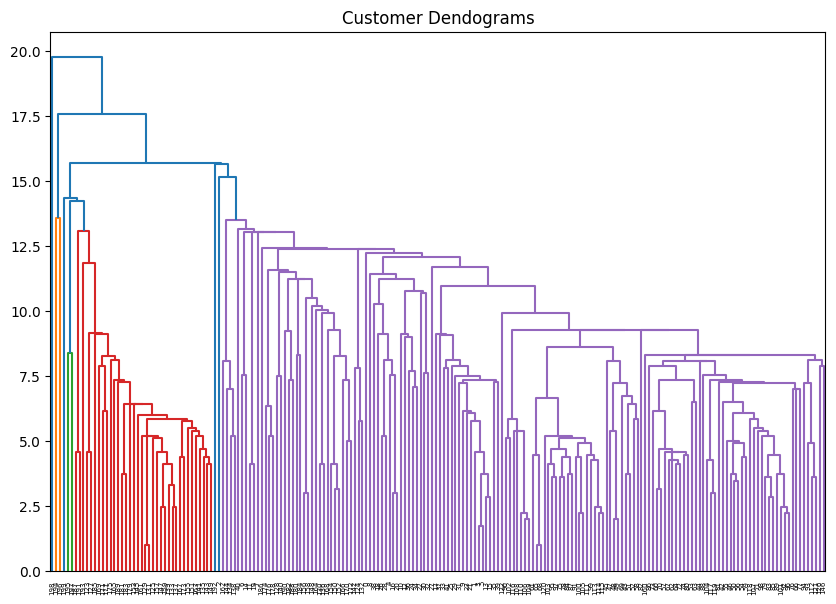

In [22]:
#code
shopping_data = pd.read_csv("shopping-data.csv")
new_shopping_data = shopping_data.drop(columns=["CustomerID","Genre"])

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(new_shopping_data, method='single'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

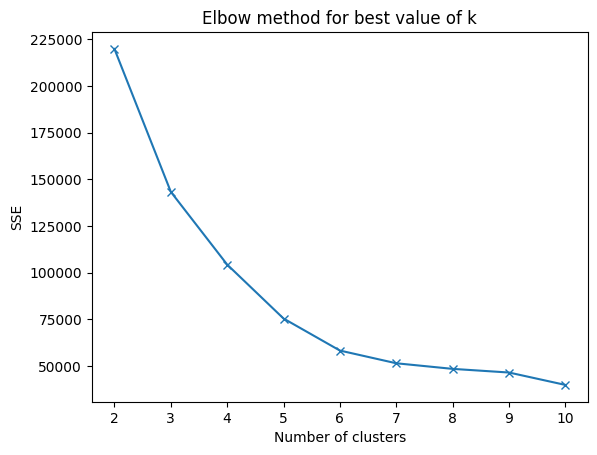

In [32]:
#code
sse = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, random_state = 42, n_init="auto")
  kmeans.fit(new_shopping_data)
  sse.append(kmeans.inertia_)
plt.plot(range(2,11), sse, marker="x")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title("Elbow method for best value of k")
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

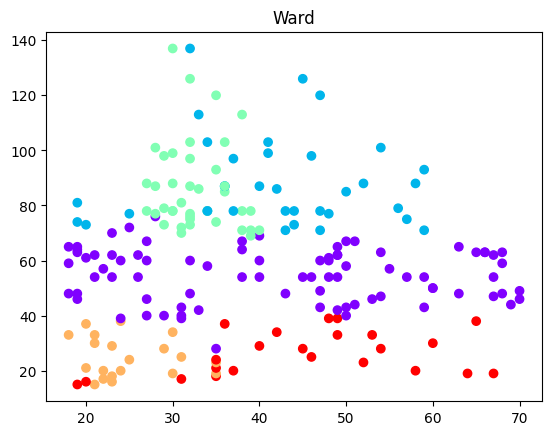

In [55]:
#code
cluster = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
cluster.fit_predict(new_shopping_data)
cluster.labels_

plt.scatter(new_shopping_data.iloc[:, 0].values, new_shopping_data.iloc[:, 1].values, c=cluster.labels_, cmap="rainbow")
plt.title("Ward")
plt.show()

#Finally,
Save a copy in your Github. Remember renaming the notebook.